In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import networkx as nx
import scipy as sc
from scipy.spatial import Delaunay
from scipy.spatial.distance import cdist
import random

import pickle

from simplicial_kuramoto import SimplicialComplex
from simplicial_kuramoto.graph_generator import modular_graph
from simplicial_kuramoto.integrators import *
from simplicial_kuramoto.plotting import *

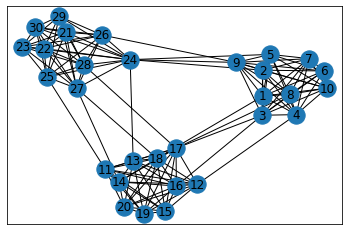

In [6]:
# modular graph
Nc=3
Nn=10
Nie=5
G=modular_graph(Nc, Nn, Nie, rando=True)
Gsc=SimplicialComplex(graph=G, no_faces=False)

community_assignment=np.asarray(list(nx.get_node_attributes(G,'community').values()))


plt.figure()
nx.draw_networkx(G)
plt.show()

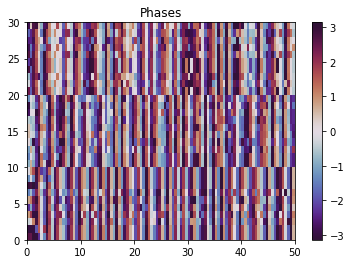

In [7]:
# normal node Kuramoto
np.random.seed(0)
initial_phase = np.random.uniform(0, 2 * np.pi, Gsc.n_nodes)
# initial_phase = np.concatenate((np.eye(len(graph.nodes -np.eye(len(graph.nodes))), axis=0).dot(initial_phase)

t_max = 50
n_t = 100
alpha_0=0
alpha_1=1.4 #np.ones(Gsc.n_edges)*np.pi

node_result = integrate_node_kuramoto(Gsc, initial_phase, t_max, n_t ,alpha_0=alpha_0,alpha_1=alpha_1)
plot_edge_kuramoto(node_result)

In [8]:
op=module_order_parameter(node_result.y,community_assignment)


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
plt.figure()
plt.plot(op[0:3,:].T)
plt.show

In [ ]:
print(Shanahan_indices(op))

In [ ]:
ps = pairwise_synchronisation(node_result.y,community_assignment)

In [ ]:
plt.plot(ps.T)

In [ ]:
ce = coalition_entropy(op)
ce

In [ ]:
gop, phase_gradient = module_gradient_parameter(node_result.y, community_assignment)
plt.imshow(phase_gradient)


In [ ]:
plt.plot(gop.T)